In [4]:
import sys
sys.path.append("..")  # Adjust if needed to point to project root

from ml.features import add_composite_scores, college_features, noncollege_features

In [5]:
import pandas as pd
from ml.features import add_composite_scores, college_features, noncollege_features

In [6]:
# load latest draftpool
df = pd.read_csv("../data/processed/2024/draftpool_stats_2024.csv")
print(f"Loaded {len(df)} prospects.")

Loaded 74 prospects.


In [7]:
# define simple weights for testing
college_weights = {
    "offense": {f: 1 for f in college_features if f not in ["TRB", "TOV"]},
    "defense": {f: 1 for f in ["TRB", "STL", "BLK", "DRB%"] if f in college_features},
    "general": {f: 1 for f in college_features}
}

noncollege_weights = {
    "offense": {f: 1 for f in noncollege_features if f not in ["TRB", "TOV"]},
    "defense": {f: 1 for f in ["TRB", "STL", "BLK"] if f in noncollege_features},
    "general": {f: 1 for f in noncollege_features}
}


In [9]:
# apply composite score logic
df = add_composite_scores(df, college_weights, noncollege_weights)
print("Composite scores added.")

Composite scores added.


In [10]:
# quick sanity check
df[["Name", "classification", "OffenseScore", "DefenseScore", "GeneralScore"]].head()

,Name,classification,OffenseScore,DefenseScore,GeneralScore
0,Reed Sheppard,College,848.748,20.6,854.848
1,Stephon Castle,College,790.840,18.0,797.040
2,Donovan Clingan,College,886.688,33.9,894.888
3,Rob Dillingham,College,898.284,15.8,903.184
4,Zach Edey,College,1456.053,40.1,1470.553


Composite scores added.


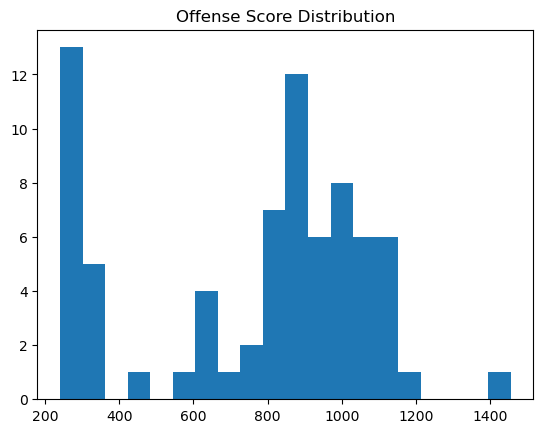

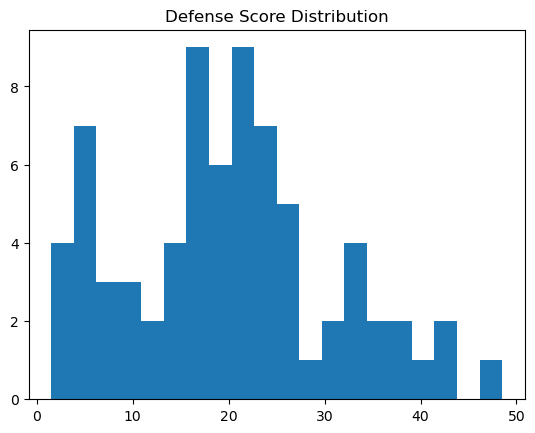

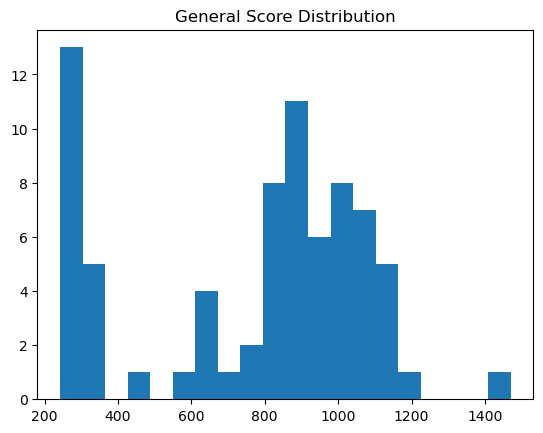

In [8]:
# visualize distributions
import matplotlib.pyplot as plt

plt.hist(df["OffenseScore"].dropna(), bins=20)
plt.title("Offense Score Distribution")
plt.show()

plt.hist(df["DefenseScore"].dropna(), bins=20)
plt.title("Defense Score Distribution")
plt.show()

plt.hist(df["GeneralScore"].dropna(), bins=20)
plt.title("General Score Distribution")
plt.show()